<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li></ul></div>

# Introduction

Short demo showing how to use ax.set_extent in the PlateCaree projection
so that changes in the central_longitude are correctly plotted on the map.

Below I make 4 plots, each with a different central_longitude, and put
Vancouver on the map.

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import cartopy.crs as ccrs

def plate_carree_plot(fig):
    
    geodetic = ccrs.Geodetic()
    
    nplots = 4
    #
    # here are some different central longitudes
    #
    central_lon = np.linspace(0.,180.,nplots)
    #
    #  make a new map for each central longitude
    #
    
    for i,the_lon in enumerate(central_lon):
        #
        # generate a new projection for each plot
        #
        projection=ccrs.PlateCarree(central_longitude=the_lon)
        ax = fig.add_subplot(
            nplots, 1, i+1,
            projection=projection)
        ax.coastlines(resolution='110m')
        #
        # here is vancouver
        #
        x,y = projection.transform_point(-129.1,49.3,geodetic)
        #
        # pass projection to the plot command to add Vancouver
        # as a blue dot
        #
        ax.plot(x,y,'bo',markersize=15,transform=projection)
        ax.gridlines()
        ax.set_title(f'central longitude = {the_lon} deg')
        #
        # set the extent for the projection
        #
        ax.set_extent([-180, 180, -90, 90], crs=projection)

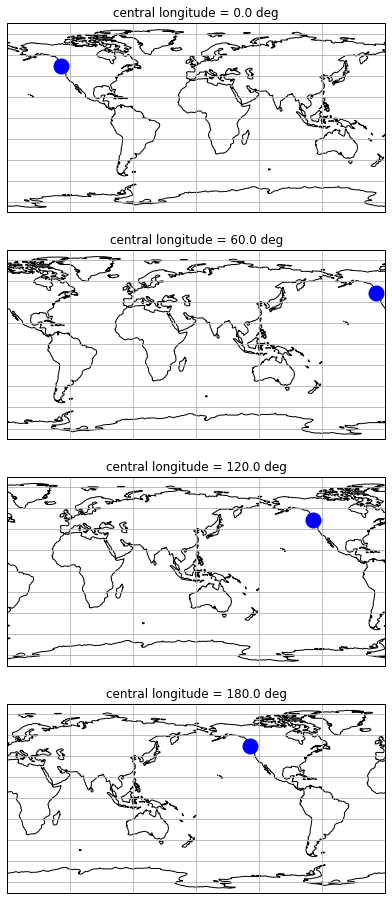

In [3]:
fig = plt.figure(figsize=(10, 16))
plate_carree_plot(fig)